<a href="https://colab.research.google.com/github/KushalranaAI/Machine-learning-/blob/main/Project_3(spam_mail_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spam mail:** Free entry in 2 a weekly competition to win FA cup final tickets 21st May 2005. Text FA to 87121 to recieve entry question.



**Ham mail:** please go ahead with watts. I just wanted to be sure. Do have a great weekand. Abiola

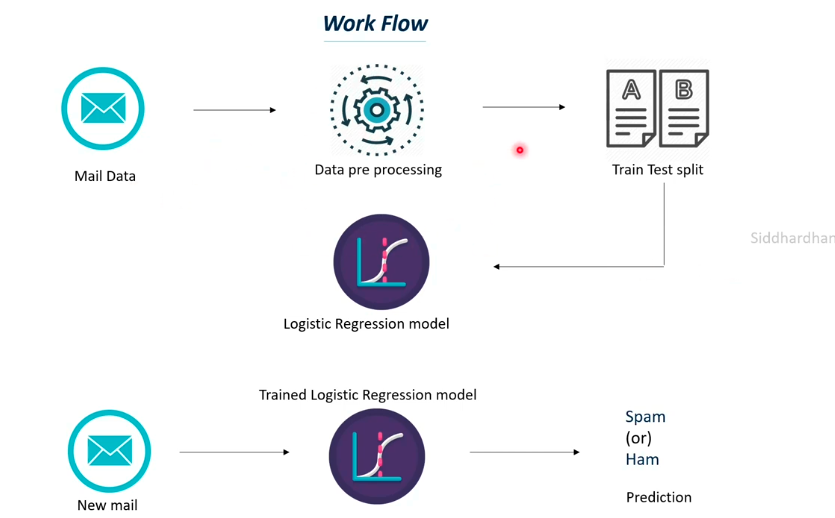

In [1]:
## importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data collection and pre-processing

In [2]:
# loading the data from csv file to a pandas dataframe
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [3]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# replace the null value with null string
raw_mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [6]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# checking hte rows and columns
mail_data.shape

(5572, 2)

Label encoding

In [9]:
# label spam mail as 0; ham mail as 1;
mail_data.loc[mail_data['Category']=='spam', 'Category'] = 0
mail_data.loc[mail_data['Category']=='ham', 'Category'] = 1

In [10]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# separating the data as texts and label
X = mail_data['Message']
Y= mail_data['Category']

In [12]:
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data training and testing

In [13]:
, TransformerMixin
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=3)

In [15]:
print(X.shape)
print(X_train.shape, X_test.shape)

(5572,)
(4457,) (1115,)


Feature extraction

In [16]:
# transform the test data to feature vector that can be used as input to the logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

In [17]:
print(feature_extraction)

TfidfVectorizer(lowercase='True', stop_words='english')


In [18]:
X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)

# convert Y_train & Y_test value as integer
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [19]:
print(X_train_feature)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Training the machine learning model

Logistic regression model

In [21]:
model = LogisticRegression()

In [22]:
# training the logistic regression model with train data
model.fit(X_train_feature, Y_train)

LogisticRegression()

Evaluating the train model

In [24]:
# predicton on train model
prediction_on_training_data = model.predict(X_train_feature)
accuracy_On_traininf_data = accuracy_score(Y_train, prediction_on_training_data)

In [25]:
print('Accuracy on training data : ', accuracy_On_traininf_data)

Accuracy on training data :  0.9670181736594121


In [26]:
prediction_on_testing_data = model.predict(X_test_feature)
accuracy_On_testing_data = accuracy_score(Y_test, prediction_on_testing_data)

In [28]:
print(accuracy_On_testing_data)

0.9659192825112107
